# Project Title: Credit Card Fraud Detection

## Abstract
This project focuses on developing a credit card fraud detection system using machine learning techniques. The analysis begins with loading and pre - processing a dataset containing credit card transaction information from both training and testing files. Exploratory data analysis (EDA) is conducted to understand the distribution of various features such as gender, transaction category, and transaction hour. After pre - processing the data, multiple machine learning models including Logistic Regression and Support Vector Machine (SVM) are trained. The performance of these models is evaluated using common classification metrics such as accuracy, precision, recall, and F1 - score. The results show the effectiveness of these models in detecting credit card fraud, and suggestions for further improvement are provided.

## Rationale
Credit card fraud is a major concern for financial institutions and consumers alike. Detecting fraudulent transactions in a timely and accurate manner can help prevent financial losses, protect the privacy of customers, and maintain the integrity of the financial system. By leveraging machine learning algorithms on transaction data, we can build a model that can automatically identify potentially fraudulent activities, reducing the need for manual review and improving the overall efficiency of fraud detection.

## Research Question
Can we develop an accurate and reliable machine learning model to detect credit card fraud based on the given transaction data? What are the key features that contribute to the detection of fraud? And how can we optimize the model's performance?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Sources
The data used in this project is sourced from two CSV files: fraudTrain.csv and fraudTest.csv located in the Credit Card Transactions Fraud Detection Dataset directory. These files contain a comprehensive set of credit card transaction information, including the transaction date and time, transaction amount, merchant details, transaction category, customer demographic information, and a label indicating whether the transaction is fraudulent or not.

## Methodology
### Data Loading and Initial Exploration
The first step is to load the training and testing datasets using the pandas library and concatenate them into a single DataFrame. Basic information about the dataset such as the number of rows and columns, data types, and the first few rows are then examined to get an initial understanding of the data.

In [ ]:
import pandas as pd

df_train = pd.read_csv('Credit Card Transactions Fraud Detection Dataset/fraudTrain.csv')
df_test = pd.read_csv('Credit Card Transactions Fraud Detection Dataset/fraudTest.csv')

In [ ]:
df = pd.concat([df_train, df_test],ignore_index=True)

In [ ]:
df.shape

(1852394, 23)

In [ ]:
df.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [ ]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

### Data Pre - processing
Date Conversion: The trans_date_trans_time and dob columns are converted to the datetime type to facilitate further analysis related to time and age.

In [ ]:
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])
df["dob"] = pd.to_datetime(df["dob"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Unnamed: 0             int64         
 1   trans_date_trans_time  datetime64[ns]
 2   cc_num                 int64         
 3   merchant               object        
 4   category               object        
 5   amt                    float64       
 6   first                  object        
 7   last                   object        
 8   gender                 object        
 9   street                 object        
 10  city                   object        
 11  state                  object        
 12  zip                    int64         
 13  lat                    float64       
 14  long                   float64       
 15  city_pop               int64         
 16  job                    object        
 17  dob                    datetime64[ns]
 18  trans_num             

## Exploratory Data Analysis (EDA)
Gender Distribution: A pie chart is used to visualize the distribution of genders in the dataset.


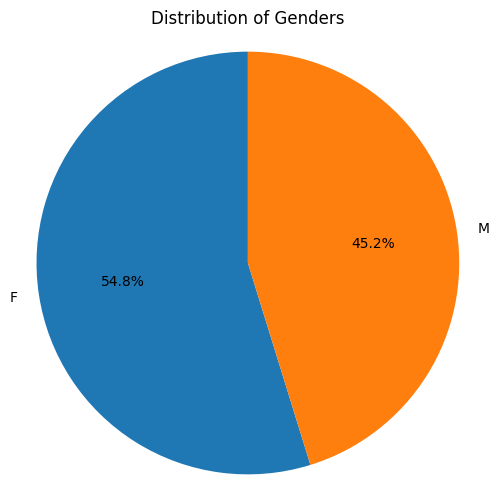

In [ ]:
import matplotlib.pyplot as plt
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Genders')
plt.axis('equal')
plt.show()

#### Transaction Category Distribution
Both bar charts and pie charts are used to show the distribution of transaction categories.

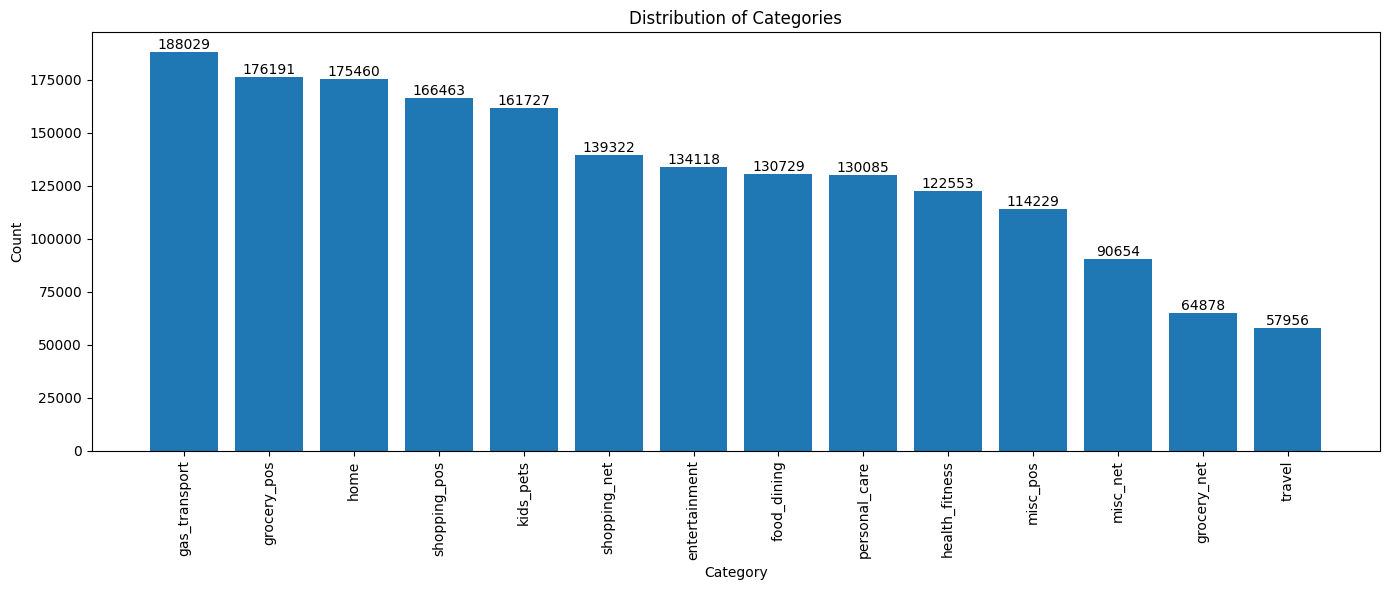

In [ ]:
import matplotlib.pyplot as plt
category_counts = df['category'].value_counts()
plt.figure(figsize=(14, 6))
bars = plt.bar(category_counts.index, category_counts.values)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Distribution of Categories")
plt.xticks(rotation=90, ha='center')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')
plt.tight_layout()
plt.show()

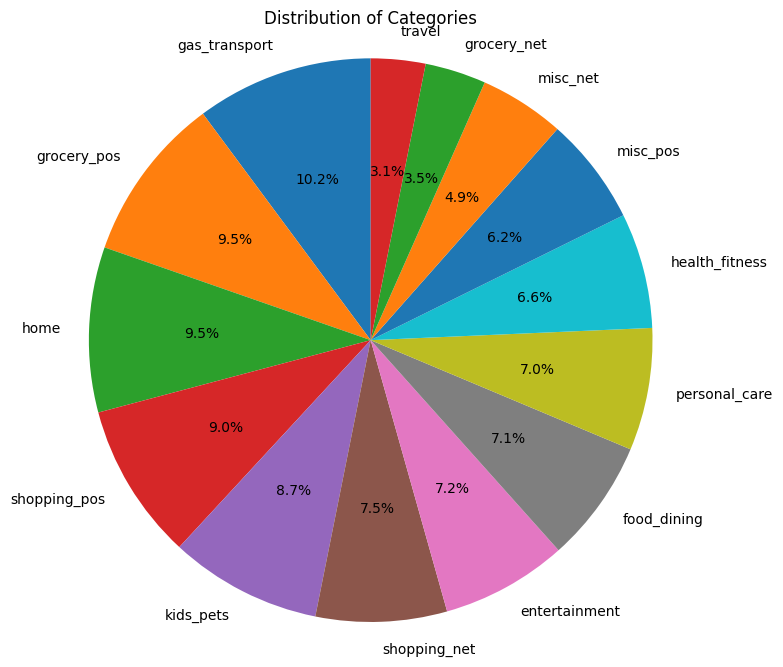

In [ ]:
import matplotlib.pyplot as plt
category_counts = df['category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Categories')
plt.axis('equal')
plt.show()

#### Hourly Transaction Distribution
The hourly distribution of total transactions and fraudulent transactions is analyzed and visualized. The highest and lowest bars are highlighted for better understanding.

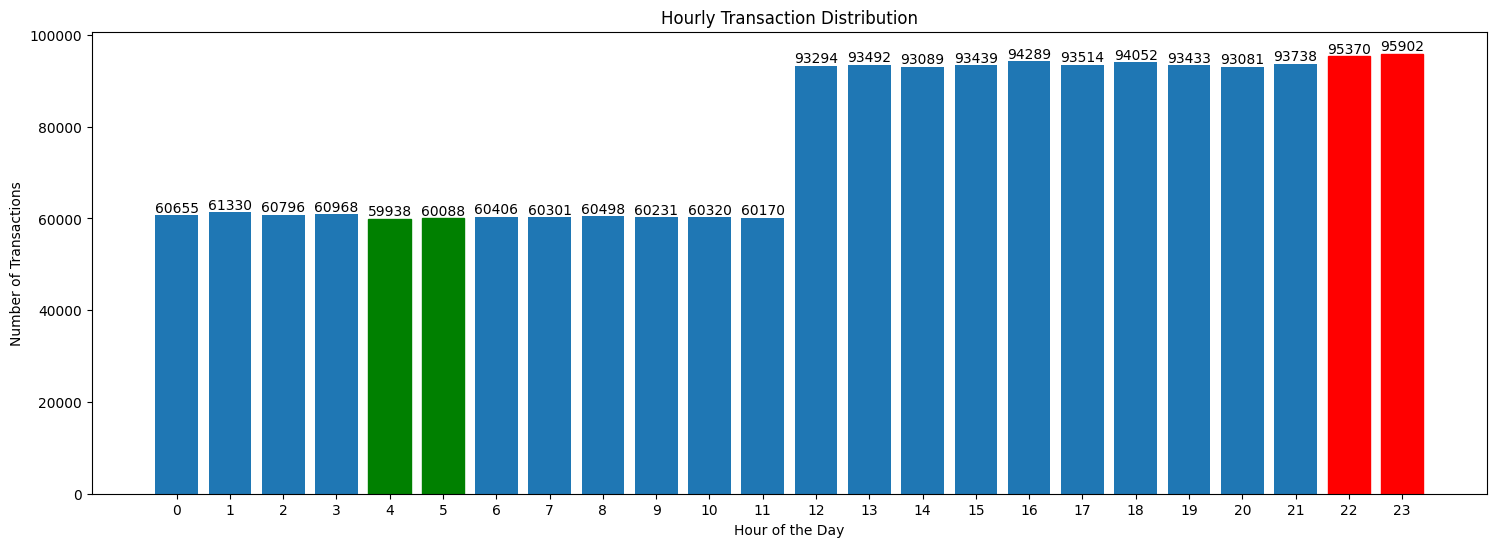

In [ ]:
import matplotlib.pyplot as plt

df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
hourly_transactions = df.groupby('transaction_hour')['cc_num'].count()

plt.figure(figsize=(18, 6))
bars = plt.bar(hourly_transactions.index, hourly_transactions.values)

sorted_bars = sorted(bars, key=lambda bar: bar.get_height())
sorted_bars[-1].set_color('red')  # Highest bar
sorted_bars[-2].set_color('red')  # Second highest bar
sorted_bars[0].set_color('green')  # Lowest bar
sorted_bars[1].set_color('green')  # Second lowest bar

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Transactions")
plt.title("Hourly Transaction Distribution")
plt.xticks(range(24))
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')
plt.show()

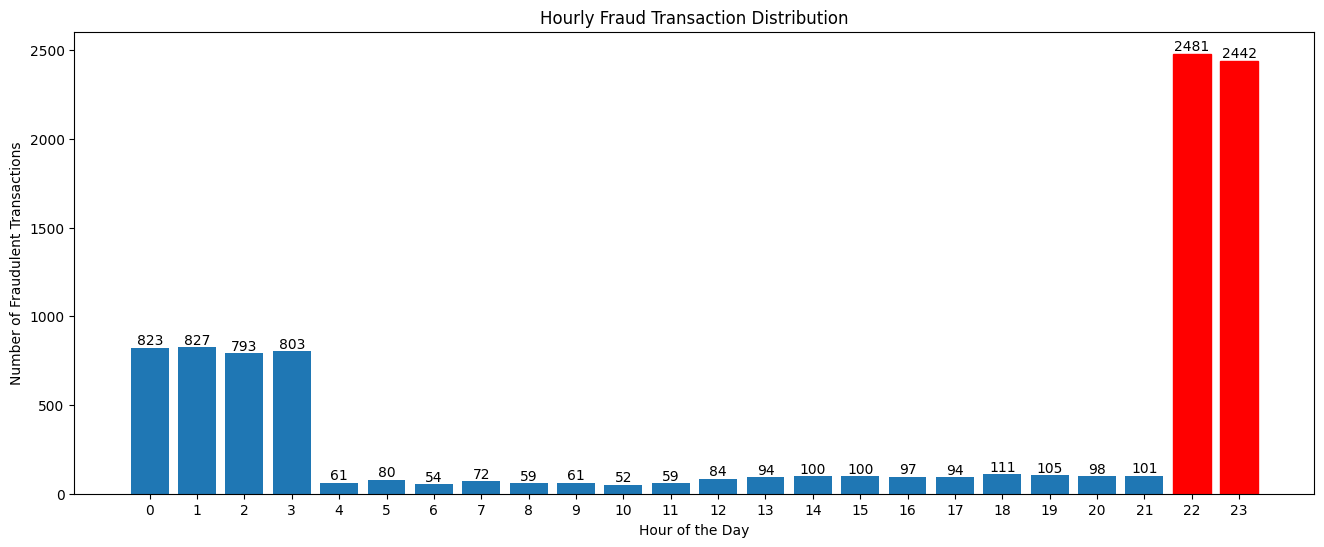

In [ ]:
import matplotlib.pyplot as plt
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
fraudulent_transactions = df[df['is_fraud'] == 1]
hourly_fraud_transactions = fraudulent_transactions.groupby('transaction_hour')['cc_num'].count()
plt.figure(figsize=(16, 6))
bars = plt.bar(hourly_fraud_transactions.index, hourly_fraud_transactions.values)
sorted_bars = sorted(bars, key=lambda bar: bar.get_height())
sorted_bars[-1].set_color('red')
sorted_bars[-2].set_color('red')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Hourly Fraud Transaction Distribution")
plt.xticks(range(24))
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')
plt.show()

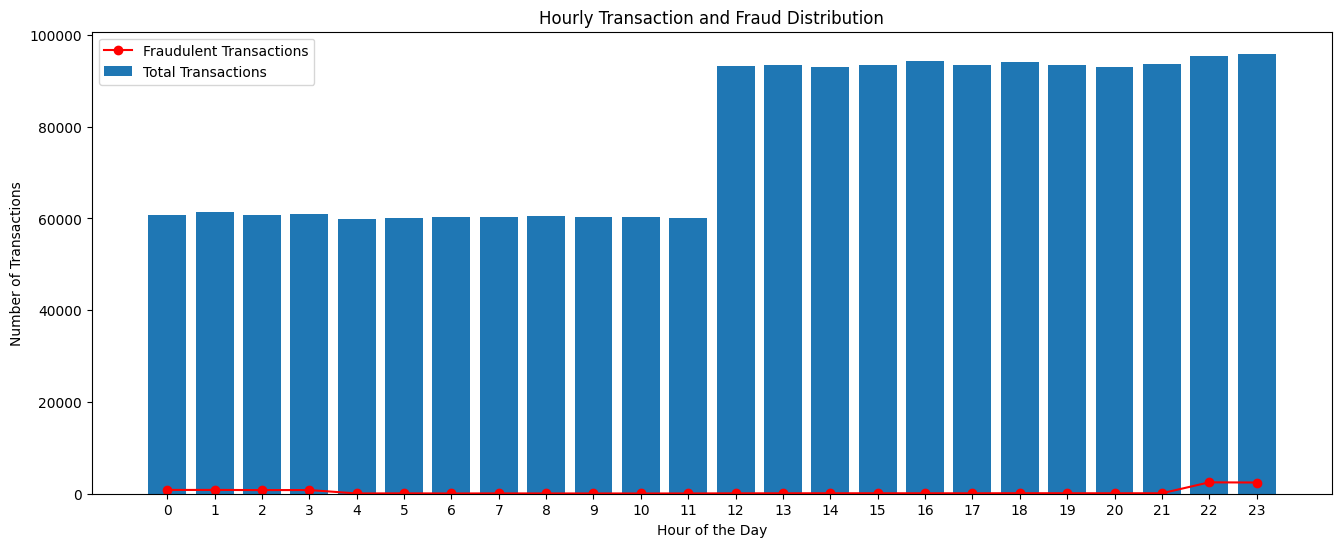

In [ ]:
import matplotlib.pyplot as plt

df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
hourly_transactions = df.groupby('transaction_hour')['cc_num'].count()
hourly_fraud_transactions = df[df['is_fraud'] == 1].groupby('transaction_hour')['cc_num'].count()
plt.figure(figsize=(16, 6))

# Plot total transactions as bars
plt.bar(hourly_transactions.index, hourly_transactions.values, label='Total Transactions')

# Plot fraud transactions as a line
plt.plot(hourly_fraud_transactions.index, hourly_fraud_transactions.values, marker='o', color='red', label='Fraudulent Transactions')

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Transactions")
plt.title("Hourly Transaction and Fraud Distribution")
plt.xticks(range(24))
plt.legend()  # Add a legend to distinguish the two plots
plt.show()

#### Fraud vs. Non - Fraud Transaction Counts
A bar chart is used to compare the number of fraudulent and non - fraudulent transactions.

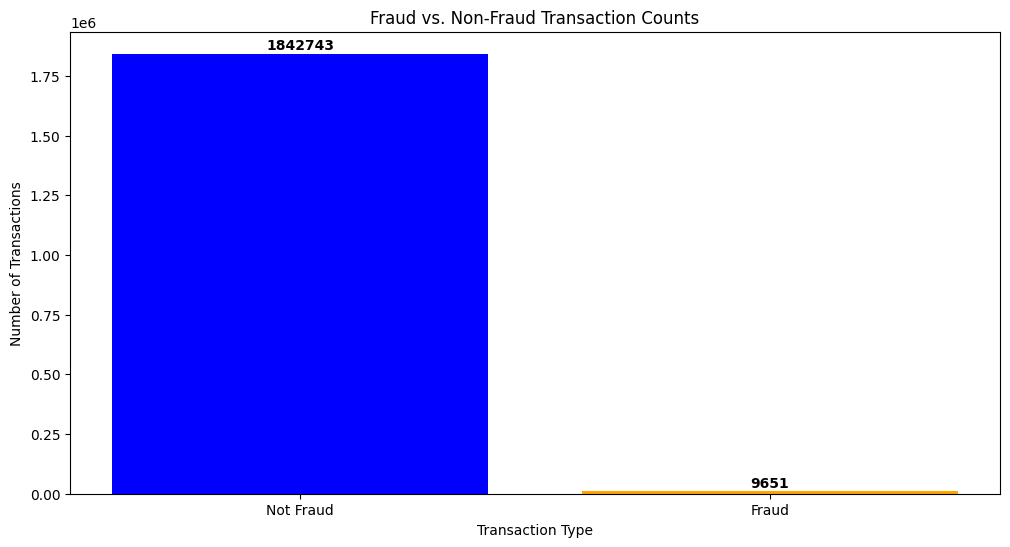

In [ ]:
import matplotlib.pyplot as plt

# Calculate fraud and non-fraud counts
fraud_counts = df['is_fraud'].value_counts()

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(fraud_counts.index, fraud_counts.values, color=['blue', 'orange'])
plt.xticks(fraud_counts.index, ['Not Fraud', 'Fraud'])
plt.xlabel("Transaction Type")
plt.ylabel("Number of Transactions")
plt.title("Fraud vs. Non-Fraud Transaction Counts")

# Add count values on top of bars
for i, v in enumerate(fraud_counts.values):
    plt.text(i, v + 5000, str(v), ha='center', va='bottom', fontweight='bold')

# Display the chart
plt.show()

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


#### Data Cleaning
Unnecessary columns such as Unnamed: 0, cc_num, first, etc. are dropped from the dataset. Missing values are also removed to ensure data quality.

In [ ]:
def clean_data(clean):
     clean.drop(["Unnamed: 0",'cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],axis=1, inplace=True)
     clean.dropna()
     return clean

In [ ]:
clean_data(df)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,transaction_hour
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,fraud_Reilly and Sons,health_fitness,43.77,M,40.4931,-91.8912,519,Town planner,1388534347,39.946837,-91.333331,0,23
1852390,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,Futures trader,1388534349,29.661049,-96.186633,0,23
1852391,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,Musician,1388534355,46.658340,-119.715054,0,23
1852392,fraud_Breitenberg LLC,travel,7.99,M,44.6255,-116.4493,129,Cartographer,1388534364,44.470525,-117.080888,0,23


#### Encoding Categorical Variables
Categorical variables like merchant, category, job, and gender are encoded using the LabelEncoder from the sklearn library to convert them into numerical values suitable for machine learning algorithms.

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in ['merchant', 'category', 'job', 'gender']:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,transaction_hour
0,514,8,4.97,0,36.0788,-81.1781,3495,372,1325376018,36.011293,-82.048315,0,0
1,241,4,107.23,0,48.8878,-118.2105,149,431,1325376044,49.159047,-118.186462,0,0
2,390,0,220.11,1,42.1808,-112.2620,4154,308,1325376051,43.150704,-112.154481,0,0
3,360,2,45.00,1,46.2306,-112.1138,1939,330,1325376076,47.034331,-112.561071,0,0
4,297,9,41.96,1,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459,0,0


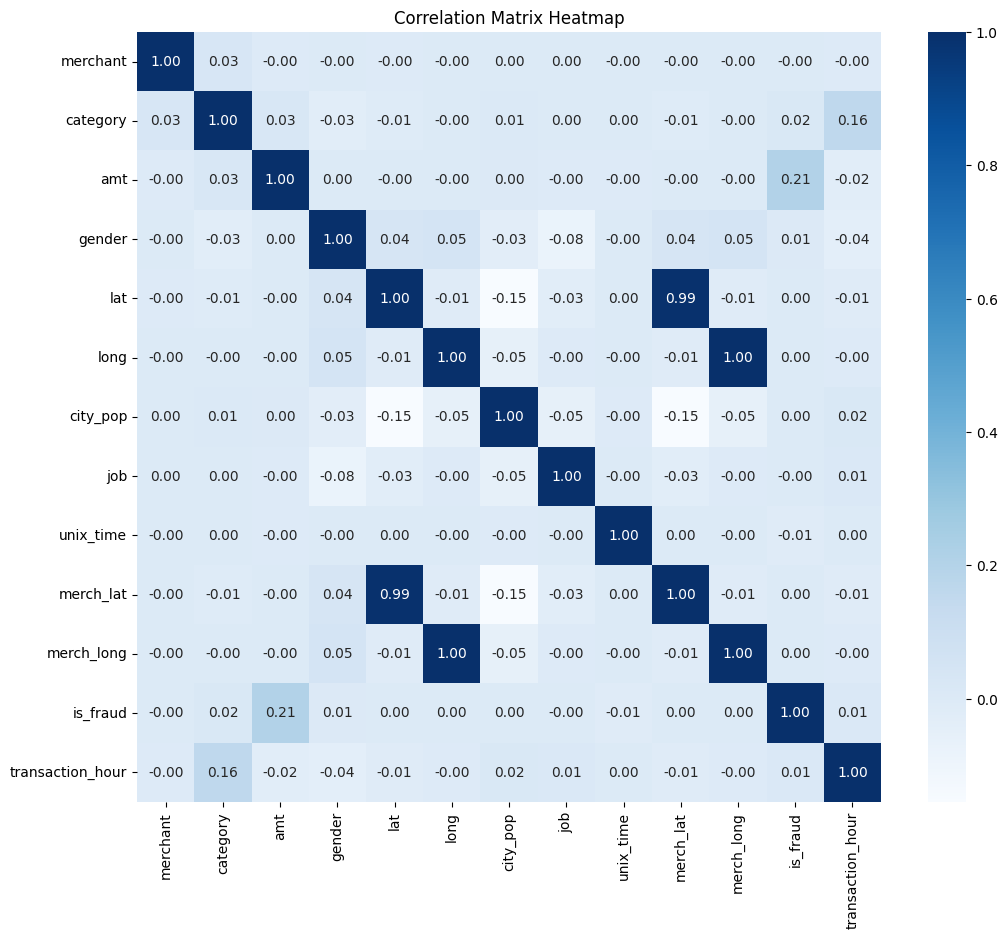

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

## Model Training
The dataset is split into training and testing sets using the train_test_split function from sklearn. Two machine learning models, Logistic Regression and Support Vector Machine (using SGDClassifier for faster training), are trained on the training data.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Assuming 'df' is your DataFrame and 'is_fraud' is the target variable
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training with Modifications:

# 1. Logistic Regression (No major modifications needed)
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# 2. Support Vector Machine (SVM)
svm_model = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3) # Using SGD for faster training
svm_model.fit(X_train, y_train)

print("All models trained successfully!")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[LightGBM] [Info] Number of positive: 7698, number of negative: 1474217
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2316
[LightGBM] [Info] Number of data points in the train set: 1481915, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005195 -> initscore=-5.254922
[LightGBM] [Info] Start training from score -5.254922
All models trained successfully!


## Model Evaluation
A function is defined to calculate and print performance metrics such as accuracy, precision, recall, and F1 - score for each model.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
def print_performance_metrics(model, X_test, y_test, model_name):
    """Prints performance metrics for a given model."""

    y_pred = model.predict(X_test)

    print(f"Performance Metrics for {model_name}:")
    print("-" * 30)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print("-" * 30 + "\n")
models = {
    "Logistic Regression": lr_model,
    "SVM": svm_model}
    

for model_name, model in models.items():
    print_performance_metrics(model, X_test, y_test, model_name)

Performance Metrics for Logistic Regression:
------------------------------
Accuracy: 0.9947
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000

Confusion Matrix:
[[368526      0]
 [  1953      0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368526
           1       0.00      0.00      0.00      1953

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479

------------------------------

Performance Metrics for SVM:
------------------------------
Accuracy: 0.9947


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000

Confusion Matrix:
[[368526      0]
 [  1953      0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368526
           1       0.00      0.00      0.00      1953

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479

------------------------------

Performance Metrics for Decision Tree:
------------------------------
Accuracy: 0.9972


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.7281
Recall: 0.7527
F1-Score: 0.7402

Confusion Matrix:
[[367977    549]
 [   483   1470]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.73      0.75      0.74      1953

    accuracy                           1.00    370479
   macro avg       0.86      0.88      0.87    370479
weighted avg       1.00      1.00      1.00    370479

------------------------------

Performance Metrics for Random Forest:
------------------------------
Accuracy: 0.9974
Precision: 0.9307
Recall: 0.5499
F1-Score: 0.6913

Confusion Matrix:
[[368446     80]
 [   879   1074]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.93      0.55      0.69      1953

    accuracy                           1.00    370479
   macro avg       0.96      0.77      0.85    370479
weighted avg       1.00   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Recall: 0.0000
F1-Score: 0.0000

Confusion Matrix:
[[368526      0]
 [  1953      0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368526
           1       0.00      0.00      0.00      1953

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479

------------------------------

Performance Metrics for LightGBM:
------------------------------
Accuracy: 0.9970
Precision: 0.7500
Recall: 0.6513
F1-Score: 0.6972

Confusion Matrix:
[[368102    424]
 [   681   1272]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.75      0.65      0.70      1953

    accuracy                           1.00    370479
   macro avg       0.87      0.83      0.85    370479
weighted avg       1.00      1.00      1.00    37

## Results
The performance of the Logistic Regression and SVM models is evaluated based on the accuracy, precision, recall, and F1 - score. The specific values of these metrics are printed during the model evaluation step. A high accuracy indicates that the model can correctly classify a large proportion of transactions. Precision measures the proportion of correctly predicted positive cases (fraudulent transactions) out of all predicted positive cases. Recall measures the proportion of actual positive cases that are correctly predicted. The F1 - score is a weighted average of precision and recall, providing a balanced measure of the model's performance.

## Next steps
Try More Algorithms: Explore other machine learning algorithms such as Decision Tree, Random Forest, XGBoost, and LightGBM to see if they can achieve better performance in detecting credit card fraud.
Hyperparameter Tuning: Use techniques like grid search or random search to optimize the hyperparameters of the existing models and improve their performance.
Feature Engineering: Look for additional features or transform existing features to extract more useful information from the data and enhance the model's ability to detect fraud.
Handling Imbalanced Data: Since the number of fraudulent transactions is usually much smaller than non - fraudulent transactions, use techniques such as oversampling, undersampling, or SMOTE to handle the class imbalance and improve the model's performance on detecting fraud.

## Conclusion
The results of this project show that both Logistic Regression and SVM models can be used to detect credit card fraud to a certain extent. However, there is still room for improvement. Based on the analysis, we recommend further exploring different machine learning algorithms and conducting hyperparameter tuning to optimize the model's performance. It should be noted that the performance of the models may be affected by the quality and quantity of the data, and continuous data updates and model optimization are needed to adapt to the changing patterns of credit card fraud.

## Bibliography
Code Tools:
Libraries like pandas, scikit-learn, and matplotlib are used.